***Prepare Data***

Use the Titanic dataset obtained from Vanderbilt University's Department of Biostatistics at https://hbiostat.org/data/repo/titanic3.csv. The Titanic data provides information about the survival of passengers on the Titanic and characteristics about the passengers such as age and ticket class.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

Use the Variables panel to open the data in Data Wrangler (an extension installed).
DO note sibsp = siblings or spouse, parch = parents or children

<Axes: xlabel='survived', ylabel='fare'>

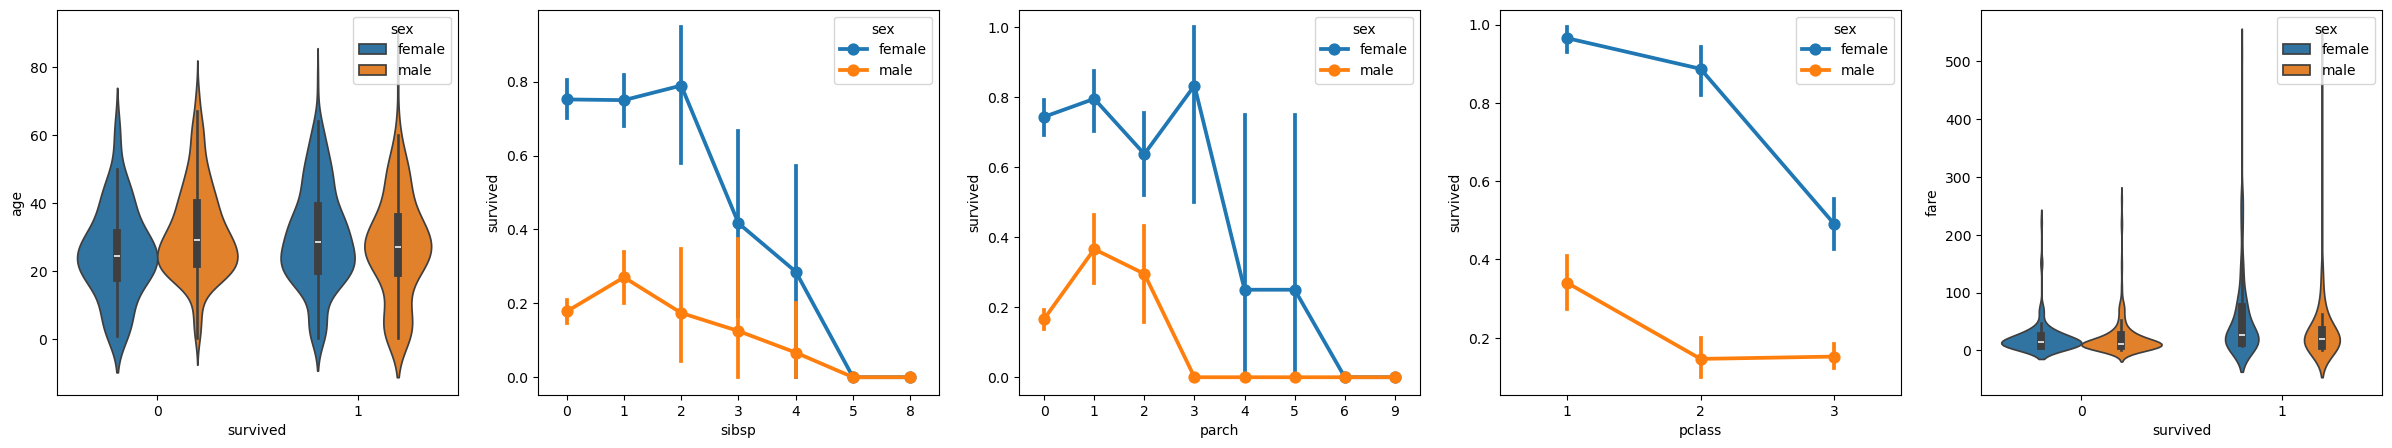

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

currently gender is stored as a string. To convert those string values to integers.

In [3]:
data.replace({'male': 1, 'female': 0}, inplace=True)

C:\Users\White House\AppData\Local\Temp\ipykernel_4276\2851430834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [4]:
# Checking if there is a correlation of any attribute with survival=1
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


sibsp and parch are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability.

In [5]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [6]:
# Drop NA data
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

***Train Data***
Divide up the dataset into training and validation data. Then normalize the inputs such that all features are treated equally. 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = (train_test_split(data[['sex','pclass','age','relatives','fare']], 
                                                     data.survived, test_size=0.2, random_state=0))

In [8]:
# Normalise data using transformation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [9]:
# fit using the Naïve Bayes algorithm from Scikit Learn
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
# Now we can predict using model and check accuracy
from sklearn import metrics
predict_test = model.predict(X_test)
print(round(metrics.accuracy_score(y_test, predict_test),2))

0.75
